In [1]:
import os
import glob
import geopandas as gpd
import rasterio
import rasterstats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define paths
base_dir = "C:/Users/bsf31/Documents/data/NL050/Santa Barbara 30m Maps v2"
cond_prob_dir = os.path.join(base_dir, "Conditional Probability Maps")
treated_cond_prob_dir = os.path.join(base_dir, "Treated Cond Prob Maps")


In [3]:
# Vector layers
vector_path = "C:/Users/bsf31/Documents/data/NL050/disaster_resilience.gpkg"
vector_layers = [
    "sb_frontcountry_existing_trts_calmapper_epsg6350",
    "g3_northsbco_vmp_rxfire_epsg6350",
    "g2_usfsgaviota_300m_buffer_rxgrazing_epsg6350",
    "g1_lompoc_rxfire_epsg6350"
]

In [4]:
def process_rasters(base_path, treatment_type):
    results = []
    for date_folder in sorted(os.listdir(base_path)):
        date_path = os.path.join(base_path, date_folder)
        if not os.path.isdir(date_path):
            continue
        
        for iter_folder in sorted(os.listdir(date_path)):
            iter_path = os.path.join(date_path, iter_folder)
            if not os.path.isdir(iter_path):
                continue
            
            predict_path = os.path.join(iter_path, "Predict_LMH.tif")
            probhigh_path = os.path.join(iter_path, "ProbHigh.tif")
            
            if os.path.exists(predict_path) and os.path.exists(probhigh_path):
                for layer in vector_layers:
                    gdf = gpd.read_file(vector_path, layer=layer)
                    gdf = gdf.to_crs(epsg=3488)
                    
                    # Compute mean values
                    mean_predict = np.mean([
                        stat['mean'] for stat in rasterstats.zonal_stats(gdf, predict_path, stats=["mean"], nodata=-9999)
                        if stat['mean'] is not None
                    ])

                    mean_probhigh = np.mean([
                        stat['mean'] for stat in rasterstats.zonal_stats(gdf, probhigh_path, stats=["mean"], nodata=-9999)
                        if stat['mean'] is not None
                    ])

                    
                    # Store results
                    results.append({
                        "date": date_folder,
                        "iteration": iter_folder,
                        "treatment_type": treatment_type,
                        "vector_layer": layer,
                        "mean_predict_lmh": mean_predict,
                        "mean_prob_high": mean_probhigh
                    })
    
    return results

In [5]:
cond_prob_results = process_rasters(cond_prob_dir, "conditional")


In [6]:
treated_prob_results = process_rasters(treated_cond_prob_dir, "treated")


In [7]:
cond_prob_results

[{'date': '2020-01-01',
  'iteration': 'Iteration_00',
  'treatment_type': 'conditional',
  'vector_layer': 'sb_frontcountry_existing_trts_calmapper_epsg6350',
  'mean_predict_lmh': np.float64(0.9687616139287947),
  'mean_prob_high': np.float64(0.06659627337063541)},
 {'date': '2020-01-01',
  'iteration': 'Iteration_00',
  'treatment_type': 'conditional',
  'vector_layer': 'g3_northsbco_vmp_rxfire_epsg6350',
  'mean_predict_lmh': np.float64(0.9772701249311598),
  'mean_prob_high': np.float64(0.07786709239636619)},
 {'date': '2020-01-01',
  'iteration': 'Iteration_00',
  'treatment_type': 'conditional',
  'vector_layer': 'g2_usfsgaviota_300m_buffer_rxgrazing_epsg6350',
  'mean_predict_lmh': np.float64(0.9797500298063507),
  'mean_prob_high': np.float64(0.06498420631582695)},
 {'date': '2020-01-01',
  'iteration': 'Iteration_00',
  'treatment_type': 'conditional',
  'vector_layer': 'g1_lompoc_rxfire_epsg6350',
  'mean_predict_lmh': np.float64(0.9643466230421772),
  'mean_prob_high': np.f

In [8]:
df = pd.DataFrame(cond_prob_results + treated_prob_results)
print(df.head())

         date     iteration treatment_type  \
0  2020-01-01  Iteration_00    conditional   
1  2020-01-01  Iteration_00    conditional   
2  2020-01-01  Iteration_00    conditional   
3  2020-01-01  Iteration_00    conditional   
4  2020-01-16  Iteration_00    conditional   

                                       vector_layer  mean_predict_lmh  \
0  sb_frontcountry_existing_trts_calmapper_epsg6350          0.968762   
1                  g3_northsbco_vmp_rxfire_epsg6350          0.977270   
2     g2_usfsgaviota_300m_buffer_rxgrazing_epsg6350          0.979750   
3                         g1_lompoc_rxfire_epsg6350          0.964347   
4  sb_frontcountry_existing_trts_calmapper_epsg6350          0.968926   

   mean_prob_high  
0        0.066596  
1        0.077867  
2        0.064984  
3        0.030856  
4        0.075214  


In [9]:
df

,date,iteration,treatment_type,vector_layer,mean_predict_lmh,mean_prob_high
0,2020-01-01,Iteration_00,conditional,sb_frontcountry_existing_trts_calmapper_epsg6350,0.968762,0.066596
1,2020-01-01,Iteration_00,conditional,g3_northsbco_vmp_rxfire_epsg6350,0.977270,0.077867
2,2020-01-01,Iteration_00,conditional,g2_usfsgaviota_300m_buffer_rxgrazing_epsg6350,0.979750,0.064984
3,2020-01-01,Iteration_00,conditional,g1_lompoc_rxfire_epsg6350,0.964347,0.030856
4,2020-01-16,Iteration_00,conditional,sb_frontcountry_existing_trts_calmapper_epsg6350,0.968926,0.075214
...,...,...,...,...,...,...
187,2020-12-01,Iteration_00,treated,g1_lompoc_rxfire_epsg6350,0.962234,0.038749
188,2020-12-16,Iteration_00,treated,sb_frontcountry_existing_trts_calmapper_epsg6350,0.968151,0.076521
189,2020-12-16,Iteration_00,treated,g3_northsbco_vmp_rxfire_epsg6350,0.975719,0.091625
190,2020-12-16,Iteration_00,treated,g2_usfsgaviota_300m_buffer_rxgrazing_epsg6350,0.971634,0.074482


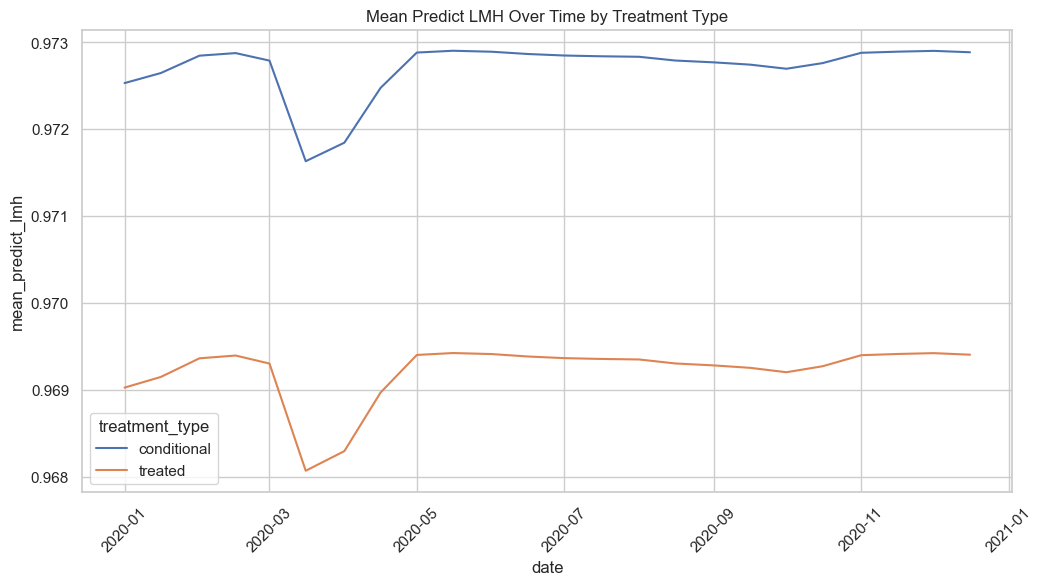

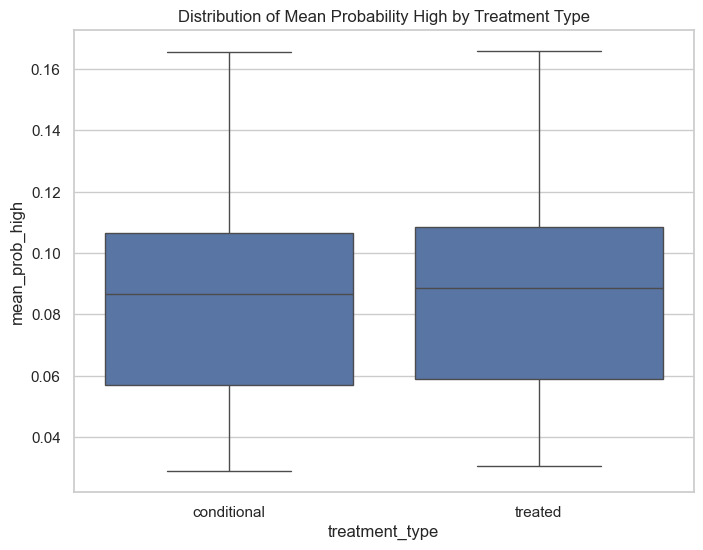

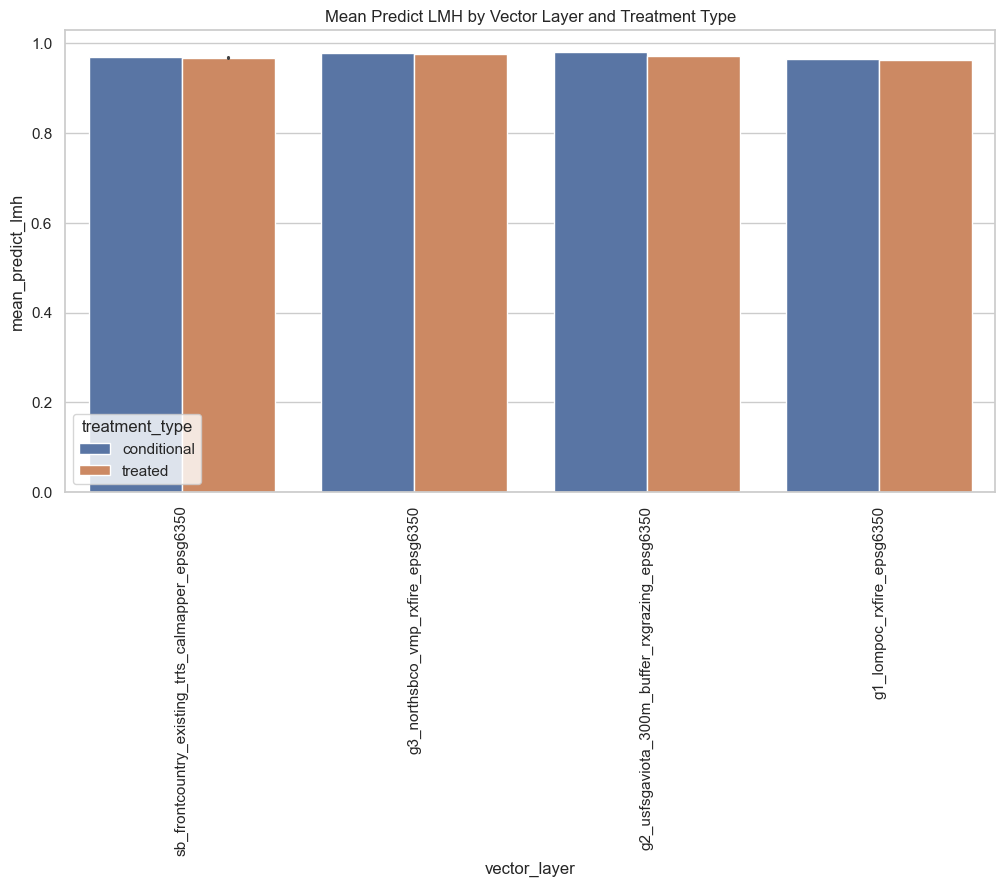

In [17]:
df["date"] = pd.to_datetime(df["date"])

# Set style for seaborn
sns.set_theme(style="whitegrid")

# Line plot: Trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="mean_predict_lmh", hue="treatment_type", errorbar=None)
plt.title("Mean Predict LMH Over Time by Treatment Type")
plt.xticks(rotation=45)
plt.show()

# Boxplot: Distribution of mean_prob_high by treatment type
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="treatment_type", y="mean_prob_high")
plt.title("Distribution of Mean Probability High by Treatment Type")
plt.show()

# Barplot: Mean values by vector layer
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="vector_layer", y="mean_predict_lmh", hue="treatment_type")
plt.xticks(rotation=90)
plt.title("Mean Predict LMH by Vector Layer and Treatment Type")
plt.show()

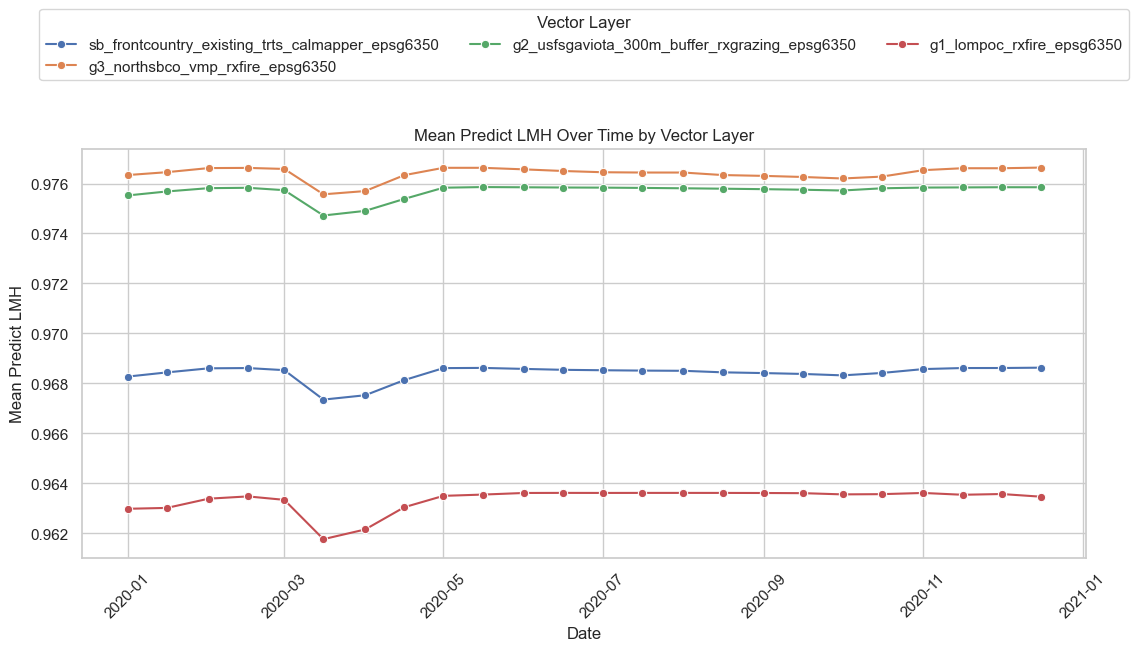

In [11]:
# Set the style
sns.set_style("whitegrid")

# Define the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Lineplot of mean_predict_lmh by vector_layer
sns.lineplot(data=df, x="date", y="mean_predict_lmh", hue="vector_layer", ax=ax, marker='o', errorbar=None)


# Set titles and labels
ax.set_title("Mean Predict LMH Over Time by Vector Layer")
ax.set_ylabel("Mean Predict LMH")
ax.set_xlabel("Date")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Move legend outside 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
#legend = ax.legend(title="Vector Layer", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#legend = ax.legend(title="Vector Layer", bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3, frameon=False)
legend = ax.legend(title="Vector Layer", bbox_to_anchor=(0.5, 1.15), loc='lower center', ncol=3, frameon=True)
# Adjust layout to make space for the legend
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Add extra space at the top

#plt.subplots_adjust(right=0.75) 
# Show the plot
plt.show()

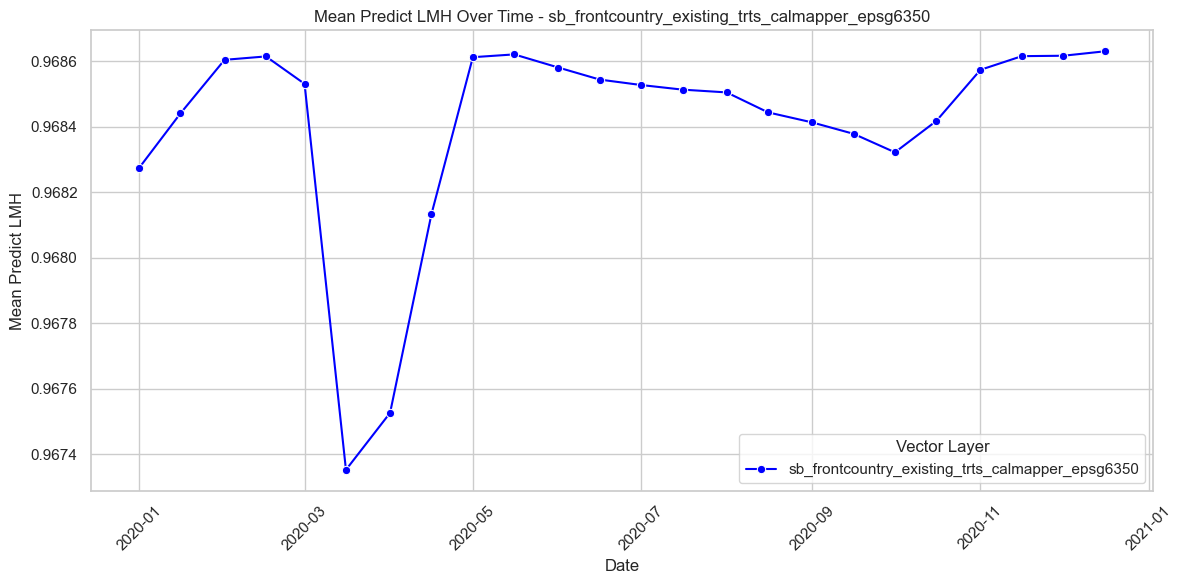

In [12]:
# Set the style
sns.set_style("whitegrid")

# Filter dataset for only the selected vector layer
filtered_df = df[df["vector_layer"] == "sb_frontcountry_existing_trts_calmapper_epsg6350"]

# Define the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Lineplot for the selected vector layer (without confidence intervals)
sns.lineplot(data=filtered_df, x="date", y="mean_predict_lmh", ax=ax, marker='o', color='blue', label="sb_frontcountry_existing_trts_calmapper_epsg6350", errorbar=None)


# Set titles and labels
ax.set_title("Mean Predict LMH Over Time - sb_frontcountry_existing_trts_calmapper_epsg6350")
ax.set_ylabel("Mean Predict LMH")
ax.set_xlabel("Date")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Move legend inside the plot
ax.legend(title="Vector Layer", loc='lower right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

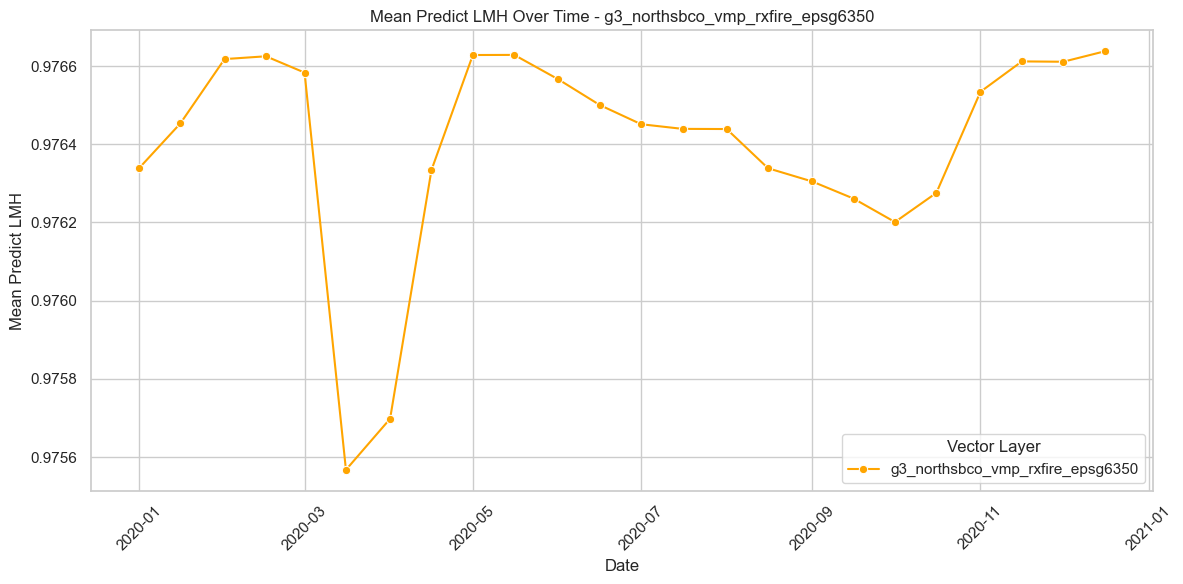

In [13]:
# Set the style
sns.set_style("whitegrid")

# Filter dataset for only the selected vector layer
filtered_df = df[df["vector_layer"] == "g3_northsbco_vmp_rxfire_epsg6350"]

# Define the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Lineplot for the selected vector layer (without confidence intervals)
sns.lineplot(data=filtered_df, x="date", y="mean_predict_lmh", ax=ax, marker='o', color='orange', label="g3_northsbco_vmp_rxfire_epsg6350", errorbar=None)



# Set titles and labels
ax.set_title("Mean Predict LMH Over Time - g3_northsbco_vmp_rxfire_epsg6350")
ax.set_ylabel("Mean Predict LMH")
ax.set_xlabel("Date")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Move legend inside the plot
ax.legend(title="Vector Layer", loc='lower right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

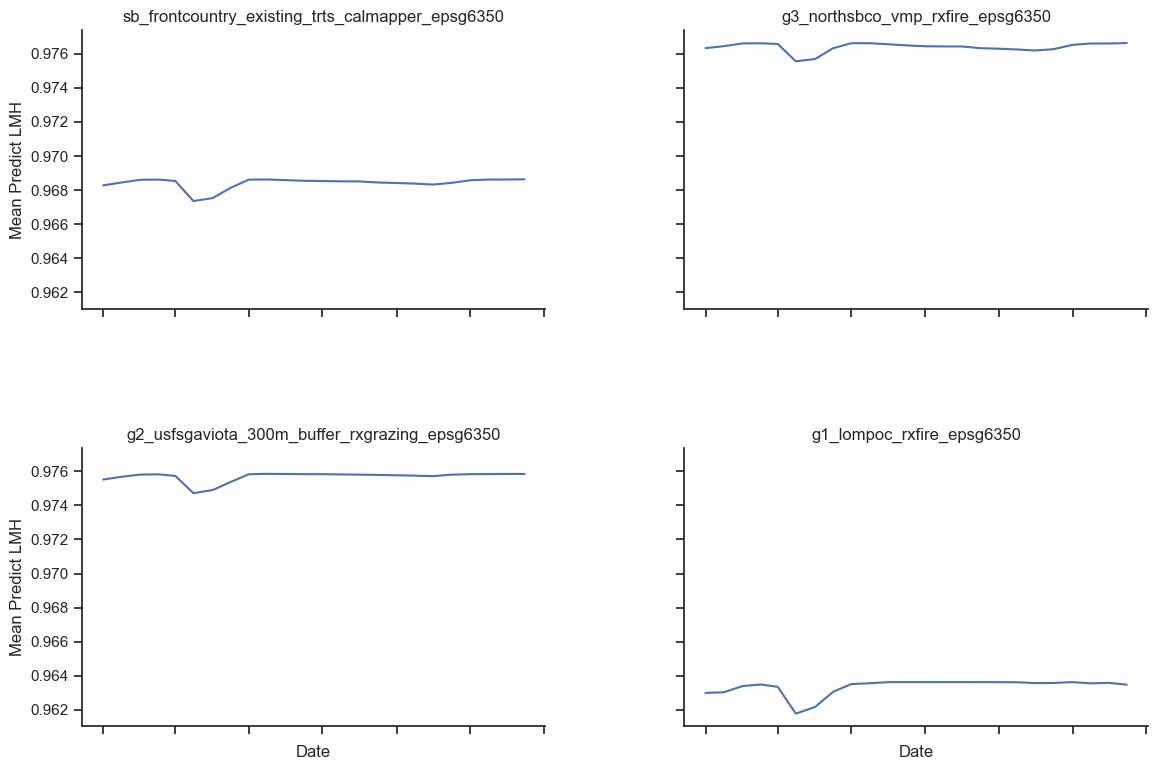

In [14]:
# Set the theme
sns.set_theme(style="ticks")

# Filter dataset for the four selected vector layers
selected_layers = [
    "sb_frontcountry_existing_trts_calmapper_epsg6350",
    "g3_northsbco_vmp_rxfire_epsg6350",
    "g2_usfsgaviota_300m_buffer_rxgrazing_epsg6350",
    "g1_lompoc_rxfire_epsg6350"
]

filtered_df = df[df["vector_layer"].isin(selected_layers)]

# Initialize a FacetGrid with larger size and better aspect ratio
grid = sns.FacetGrid(filtered_df, col="vector_layer", palette="tab10",
                     col_wrap=2, height=4, aspect=1.5, sharey=True)

# Plot only scatter points (no lines)
grid.map(sns.lineplot, "date", "mean_predict_lmh", errorbar=None)

# Adjust x-axis ticks for readability
grid.set_xticklabels(rotation=45)

# Set labels
grid.set_axis_labels("Date", "Mean Predict LMH")
grid.set_titles(col_template="{col_name}")  # Display vector layer name in each subplot

# Adjust layout for better spacing
grid.fig.subplots_adjust(wspace=0.3, hspace=0.5)  # Add space between plots

# Show the plots
plt.show()

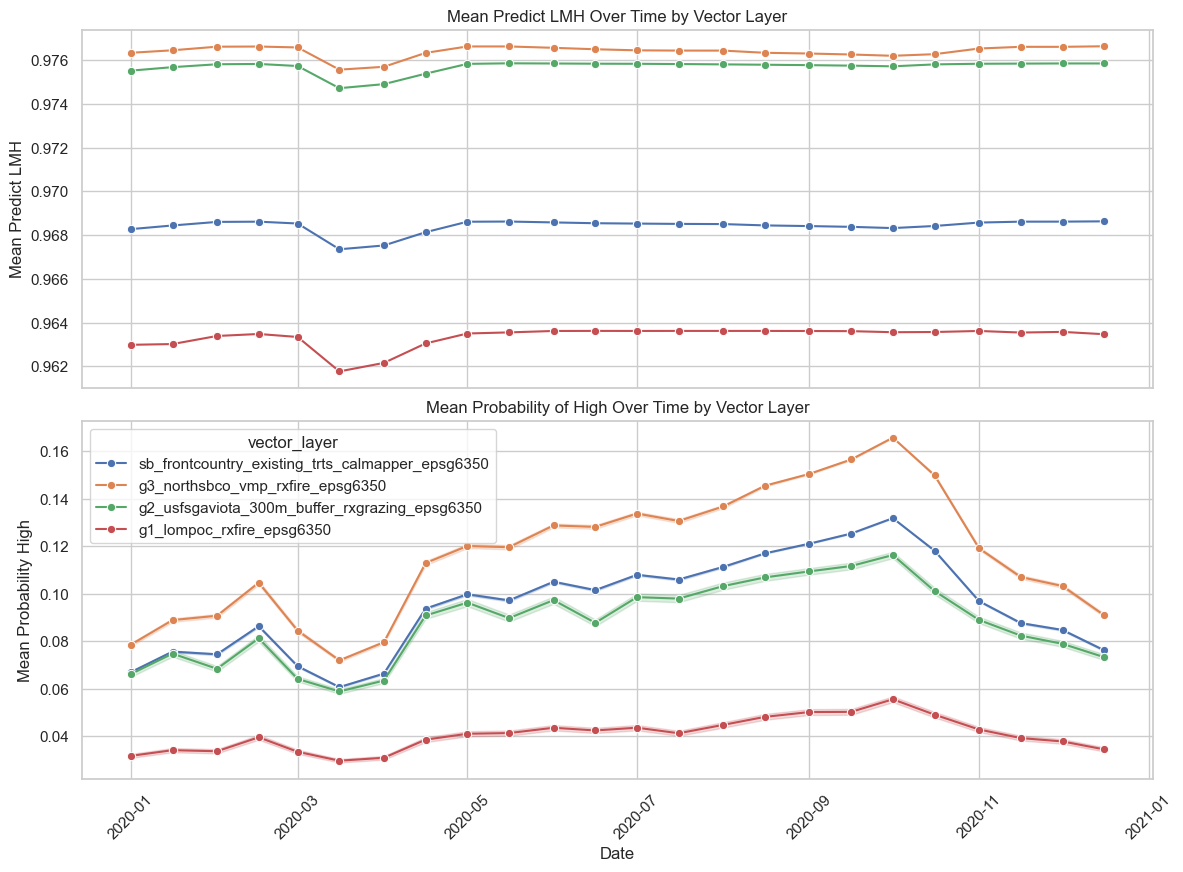

In [23]:
# Set the style
sns.set_style("whitegrid")

# Define the figure size
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Lineplot of mean_predict_lmh by vector_layer
sns.lineplot(data=df, x="date", y="mean_predict_lmh", hue="vector_layer", ax=axes[0], errorbar= None, marker='o', legend=False)
axes[0].set_title("Mean Predict LMH Over Time by Vector Layer")
axes[0].set_ylabel("Mean Predict LMH")




# Lineplot of mean_prob_high by vector_layer
sns.lineplot(data=df, x="date", y="mean_prob_high", hue="vector_layer", ax=axes[1], marker='o')
axes[1].set_title("Mean Probability of High Over Time by Vector Layer")
axes[1].set_ylabel("Mean Probability High")
axes[1].set_xlabel("Date")



# Rotate x-axis labels for readability
plt.xticks(rotation=45)

legend = ax.legend(title="Vector Layer", bbox_to_anchor=(0.5, 1.15), loc='lower center', ncol=3, frameon=True)

plt.tight_layout()
plt.subplots_adjust(top=0.85) 
# Show the plots
plt.show()